# Temperature Forecast Project using ML

### Project Description

This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("temperature.csv")
print(data.shape)
data.head()

(7752, 25)


station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0  30-06-2013          28.7          21.4    58.255688    91.116364   
1      2.0  30-06-2013          31.9          21.6    52.263397    90.604721   
2      3.0  30-06-2013          31.6          23.3    48.690479    83.973587   
3      4.0  30-06-2013          32.0          23.4    58.239788    96.483688   
4      5.0  30-06-2013          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...  LDAPS_PPT2  \
0         28.074101         23.006936  6.818887   69.451805  ...         0.0   
1         29.850689         24.035009  5.691890   51.937448  ...         0.0   
2         30.091292         24.565633  6.138224   20.573050  ...         0.0   
3         29.704629         23.326177  5.650050   65.727144  ...         0.0   
4         29.113934         23.486480  5.735004  107.965535  ...         0.0   

   LDAPS_PPT3  LDAPS_PPT4      lat      lon       DEM   Slope  \
0         0.0         0.0  37.6046  126.991  212.3350  2.7850   
1         0.0         0.0  37.6046  127.032   44.7624  0.5141   
2         0.0         0.0  37.5776  127.058   33.3068  0.2661   
3         0.0         0.0  37.6450  127.022   45.7160  2.5348   
4         0.0         0.0  37.5507  127.135   35.0380  0.5055   

   Solar radiation  Next_Tmax  Next_Tmin  
0      5992.895996       29.1       21.2  
1      5869.312500       30.5       22.5  
2      5863.555664       31.1       23.9  
3      5856.964844       31.7       24.3  
4      5859.552246       31.2       22.5  

[5 rows x 25 columns]

In [3]:
data.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

### Attribute Information:
For more information, read [Cho et al, 2020].


1. station - used weather station number: 1 to 25
    
2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    
3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    
4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    
5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    
6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    
7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    
8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    
9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    
10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    
11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    
12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    
13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    
14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    
15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    
16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    
17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    
18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    
19. lat - Latitude (Â°): 37.456 to 37.645
    
20. lon - Longitude (Â°): 126.826 to 127.135
    
21. DEM - Elevation (m): 12.4 to 212.3
    
22. Slope - Slope (Â°): 0.1 to 5.2
    
23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    
24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    
25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T
    

You have to build separate models that can predict the minimum temperature for the next day and the maximum temperature for the next day based on the details provided in the dataset.


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


In this data set the date column is in object type and rest in in float.

Some columns has missing values.

Next_Tmax and Next_Tmin is our target variables.

In [5]:
# Lets check the duplicate values 
data.duplicated().sum()

0

No duplicate values are present in the dataset 

In [6]:
#checking the missing value percentage
missing_value = data.isnull().sum().sort_values(ascending = False)
percentage_missing_values = (missing_value/len(data))*100
pd.concat([missing_value,percentage_missing_values], axis = 1 , keys = ['Missing Values', '% Missing data'])

Missing Values  % Missing data
LDAPS_CC3                     75        0.967492
LDAPS_PPT4                    75        0.967492
LDAPS_PPT2                    75        0.967492
LDAPS_PPT1                    75        0.967492
LDAPS_CC4                     75        0.967492
LDAPS_CC2                     75        0.967492
LDAPS_CC1                     75        0.967492
LDAPS_LH                      75        0.967492
LDAPS_WS                      75        0.967492
LDAPS_Tmin_lapse              75        0.967492
LDAPS_Tmax_lapse              75        0.967492
LDAPS_RHmax                   75        0.967492
LDAPS_RHmin                   75        0.967492
LDAPS_PPT3                    75        0.967492
Present_Tmin                  70        0.902993
Present_Tmax                  70        0.902993
Next_Tmax                     27        0.348297
Next_Tmin                     27        0.348297
Date                           2        0.025800
station                        2        0.025800
lat                            0        0.000000
lon                            0        0.000000
DEM                            0        0.000000
Slope                          0        0.000000
Solar radiation                0        0.000000

In [7]:
#pd.concat?

As we can see the missing values are very less so we can drop them.

In [8]:
data1 = data.copy()
print("Number of rows : ",data1.shape[0])
print("Number of columns : ",data1.shape[1])
data1.dropna(inplace=True)
print("After droping number of rows are {} and columns {}".format(data1.shape[0],data1.shape[1]))

Number of rows :  7752
Number of columns :  25
After droping number of rows are 7588 and columns 25


Now We don't have any missing data

In [9]:
# Now lets convert date object columne on datatime
data1['Date']=pd.to_datetime(data1['Date'])


In [10]:
data1['Day']=data1['Date'].apply(lambda x:x.day)
data1['Month']=data1['Date'].apply(lambda x:x.month)
data1['Year']=data1['Date'].apply(lambda x:x.year)
data1.head()

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0      1.0 2013-06-30          28.7          21.4    58.255688    91.116364   
1      2.0 2013-06-30          31.9          21.6    52.263397    90.604721   
2      3.0 2013-06-30          31.6          23.3    48.690479    83.973587   
3      4.0 2013-06-30          32.0          23.4    58.239788    96.483688   
4      5.0 2013-06-30          31.4          21.9    56.174095    90.155128   

   LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  ...      lat  \
0         28.074101         23.006936  6.818887   69.451805  ...  37.6046   
1         29.850689         24.035009  5.691890   51.937448  ...  37.6046   
2         30.091292         24.565633  6.138224   20.573050  ...  37.5776   
3         29.704629         23.326177  5.650050   65.727144  ...  37.6450   
4         29.113934         23.486480  5.735004  107.965535  ...  37.5507   

       lon       DEM   Slope  Solar radiation  Next_Tmax  Next_Tmin  Day  \
0  126.991  212.3350  2.7850      5992.895996       29.1       21.2   30   
1  127.032   44.7624  0.5141      5869.312500       30.5       22.5   30   
2  127.058   33.3068  0.2661      5863.555664       31.1       23.9   30   
3  127.022   45.7160  2.5348      5856.964844       31.7       24.3   30   
4  127.135   35.0380  0.5055      5859.552246       31.2       22.5   30   

   Month  Year  
0      6  2013  
1      6  2013  
2      6  2013  
3      6  2013  
4      6  2013  

[5 rows x 28 columns]

In [11]:
data1.describe()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
count  7588.000000   7588.000000   7588.000000  7588.000000  7588.000000   
mean     13.014101     29.748366     23.195809    56.724969    88.360823   
std       7.217858      2.967401      2.400880    14.626559     7.199456   
min       1.000000     20.000000     11.300000    19.794666    58.936283   
25%       7.000000     27.800000     21.600000    45.960243    84.203724   
50%      13.000000     29.900000     23.400000    55.023199    89.784122   
75%      19.000000     32.000000     24.800000    67.115099    93.742725   
max      25.000000     37.600000     29.900000    98.524734   100.000153   

       LDAPS_Tmax_lapse  LDAPS_Tmin_lapse     LDAPS_WS     LDAPS_LH  \
count       7588.000000       7588.000000  7588.000000  7588.000000   
mean          29.620128         23.511786     7.094097    62.492606   
std            2.943496          2.342579     2.177034    33.686158   
min           17.624954         14.272646     2.882580   -13.603212   
25%           27.673756         22.086820     5.675358    37.206201   
50%           29.709537         23.758249     6.547838    56.898324   
75%           31.711109         25.155660     8.028960    84.235666   
max           38.542255         29.619342    21.857621   213.414006   

         LDAPS_CC1  ...          lat         lon          DEM        Slope  \
count  7588.000000  ...  7588.000000  7588.00000  7588.000000  7588.000000   
mean      0.368510  ...    37.544792   126.99142    61.918136     1.259755   
std       0.262260  ...     0.050428     0.07922    54.323529     1.372748   
min       0.000000  ...    37.456200   126.82600    12.370000     0.098500   
25%       0.146546  ...    37.510200   126.93700    28.700000     0.271300   
50%       0.315706  ...    37.550700   126.99500    45.716000     0.618000   
75%       0.574174  ...    37.577600   127.04200    59.832400     1.767800   
max       0.967277  ...    37.645000   127.13500   212.335000     5.178200   

       Solar radiation    Next_Tmax    Next_Tmin          Day        Month  \
count      7588.000000  7588.000000  7588.000000  7588.000000  7588.000000   
mean       5343.724208    30.241526    22.910820    16.337375     7.068134   
std         429.782561     3.111807     2.482256     8.216880     2.242389   
min        4329.520508    17.400000    11.300000     7.000000     1.000000   
25%        5001.485717    28.200000    21.300000     8.000000     7.000000   
50%        5441.987305    30.400000    23.100000    16.000000     7.000000   
75%        5729.485840    32.600000    24.600000    24.000000     8.000000   
max        5992.895996    38.900000    29.800000    31.000000    12.000000   

              Year  
count  7588.000000  
mean   2014.991697  
std       1.410877  
min    2013.000000  
25%    2014.000000  
50%    2015.000000  
75%    2016.000000  
max    2017.000000  

[8 rows x 27 columns]

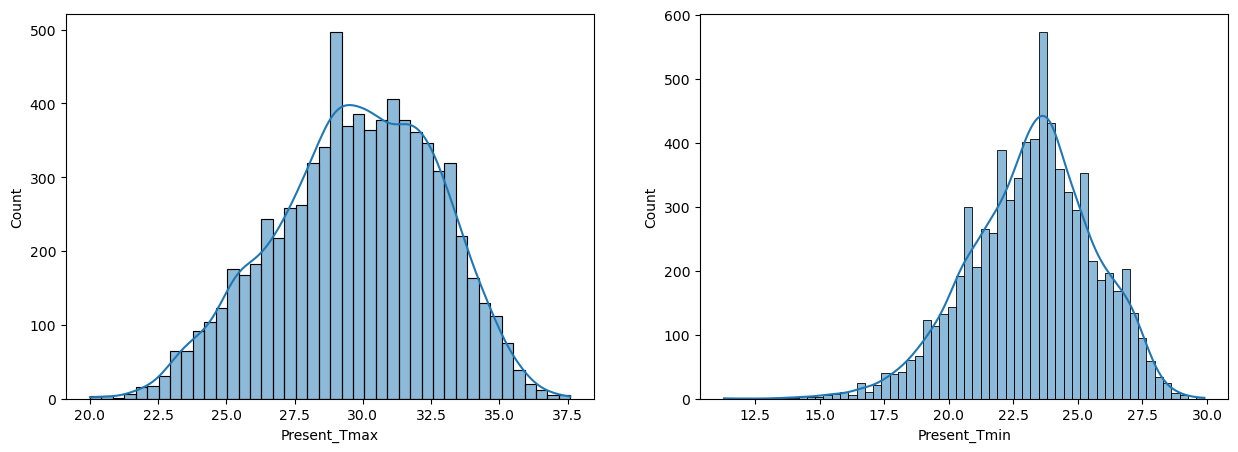

In [12]:
# Plotting histogram for present_Tmax and present_Tmin variables
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.histplot(data1['Present_Tmax'],kde = True)
plt.subplot(1,2,2)
sns.histplot(data1['Present_Tmin'],kde = True)
plt.show()

For majority of reading Present Temperature Maximum varies in between 27.5 to 32.5 degree

For majority of reading Present Temperature Minimum varies in between 22.5 to 26 degree

In [13]:
#Let's find the max and min temperature
print('Present Maximum Temperature Maxima in year 2013-2016 :',data1['Present_Tmax'].max())
print('Present Minimum Temperature Manima in year 2013-2016 :',data1['Present_Tmax'].min())
print('Average Present Maximum Temperature in year 2013-2016 :',data1['Present_Tmax'].mean())
print("\n")
print('Present Minimum Temperature Maxima in year 2013-2016 :',data1['Present_Tmin'].max())
print('Present Minimum Temperature Minima in year 2013-2016 :',data1['Present_Tmin'].min())
print('Average Present Minimum Temperature in year 2013-2016 :',data1['Present_Tmin'].mean())

Present Maximum Temperature Maxima in year 2013-2016 : 37.6
Present Minimum Temperature Manima in year 2013-2016 : 20.0
Average Present Maximum Temperature in year 2013-2016 : 29.748365840801227


Present Minimum Temperature Maxima in year 2013-2016 : 29.9
Present Minimum Temperature Minima in year 2013-2016 : 11.3
Average Present Minimum Temperature in year 2013-2016 : 23.195809172377487


In [14]:
# Maximum Present_Tmax temp row
data1.loc[data1.Present_Tmax==data1.Present_Tmax.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
5717     18.0 2016-11-08          37.6          26.8    44.254253   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
5717    87.745514         34.794021         27.150764  6.366598  111.225118   

      ...      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
5717  ...  37.4832  127.024  56.4448  1.2313      5082.563477       37.0   

      Next_Tmin  Day  Month  Year  
5717       27.8    8     11  2016  

[1 rows x 28 columns]

Present Maximum Temperature Maxima over four year span recorded at station 18.0 on 2016-11-08 with Temp of 37.6 degree

In [15]:
# Minimum Present_Tmax temp row
data1.loc[data1.Present_Tmax==data1.Present_Tmax.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
7725      1.0 2017-08-30          20.0          15.1    35.652172   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  \
7725     89.97319         24.323737         16.128899  7.087329  108.981108   

      ...      lat      lon      DEM  Slope  Solar radiation  Next_Tmax  \
7725  ...  37.6046  126.991  212.335  2.785       4614.76123       23.8   

      Next_Tmin  Day  Month  Year  
7725       15.1   30      8  2017  

[1 rows x 28 columns]

Present Maximum Temperature Minima over four year span recorded at station 1 on 2017-08-30 with Temp of 20 degree.

In [16]:
# Maximum Present_Tmin temp row
data1.loc[data1.Present_Tmin==data1.Present_Tmin.max()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
2397     23.0 2014-02-08          35.3          29.9    53.946949   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
2397    85.985161         30.912804         25.439537  13.011129  117.837212   

      ...      lat      lon      DEM   Slope  Solar radiation  Next_Tmax  \
2397  ...  37.5372  126.891  15.5876  0.1554      5360.226563       31.3   

      Next_Tmin  Day  Month  Year  
2397       24.8    8      2  2014  

[1 rows x 28 columns]

Present Maximum Temperature Maxima over four year span recorded at station 23 on 2014-02-08 with Temp of 29.9 degree

In [17]:
# Minimum Present_Tmin temp row
data1.loc[data1.Present_Tmin==data1.Present_Tmin.min()]

station       Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
6116     17.0 2016-08-27          27.1          11.3    62.793823   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  \
6116    91.726936         23.529546         17.963487  7.984566  84.48145   

      ...      lat      lon      DEM  Slope  Solar radiation  Next_Tmax  \
6116  ...  37.6181  127.099  53.4712  0.697      4539.616699       24.6   

      Next_Tmin  Day  Month  Year  
6116       17.1   27      8  2016  

[1 rows x 28 columns]

Present Maximum Temperature Minima over four year span recorded at station 17 on 2016-08-27 with Temp of 11.3 degree

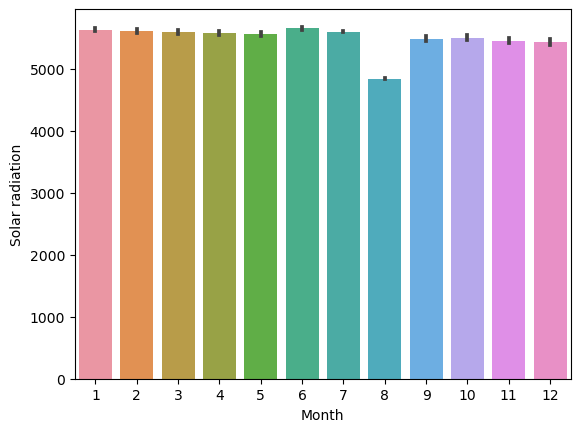

In [18]:
sns.barplot(x=data1['Month'], y=data1['Solar radiation'])
plt.show()

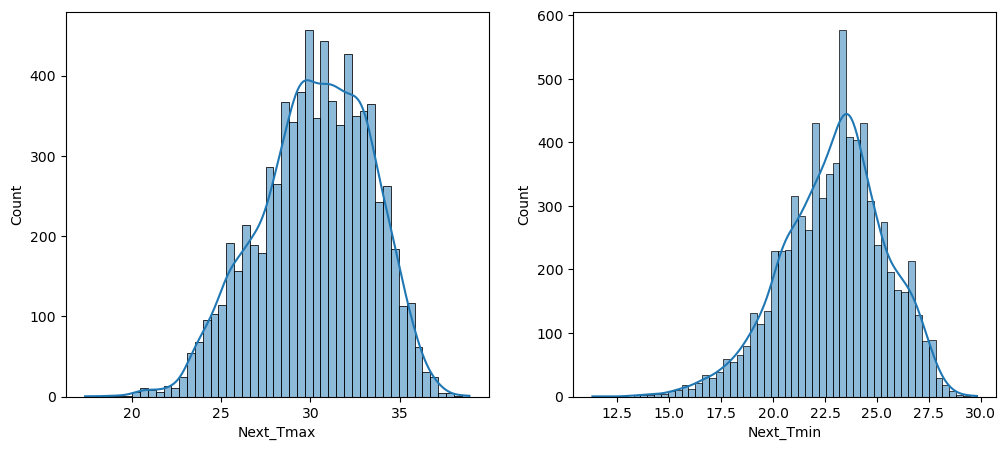

In [19]:
# Plotting histogram for target variables
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(data1['Next_Tmax'],kde=True)
plt.subplot(1,2,2)
sns.histplot(data1['Next_Tmin'],kde=True)
plt.show()

For majority of reading Next Temperature Maximum varies in between 27.5 to 32.5 degree.

For majority of reading Next Temperature Minimum varies in between 22.5 to 26 degree.

This is same as present temperature.

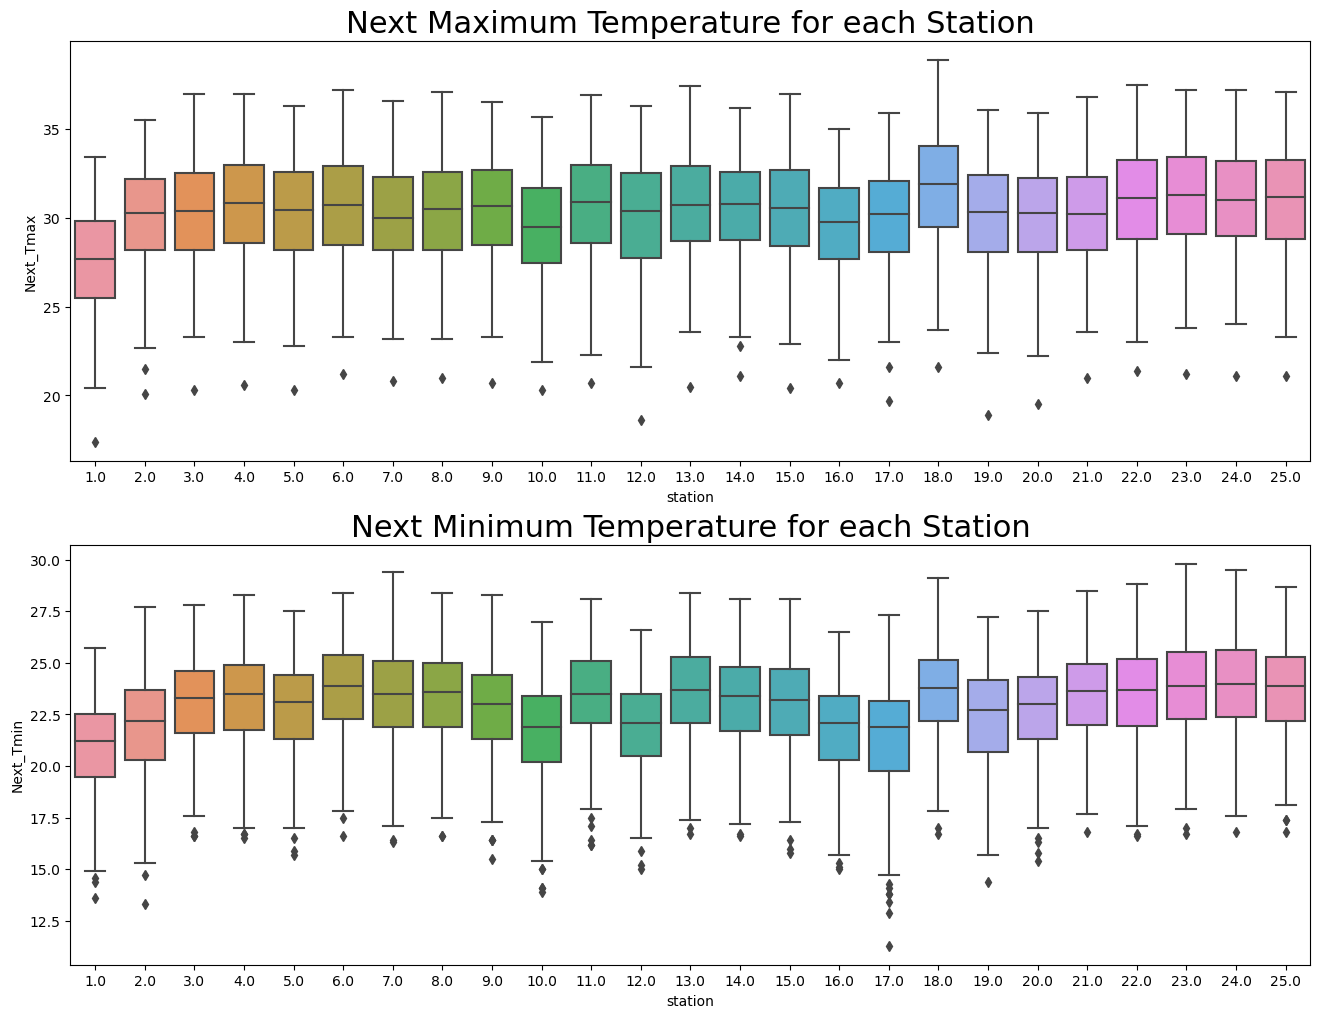

In [20]:
# Visualizing the realtion between station and target variables
plt.figure(figsize=(16,12))
plt.subplot(2,1,1)
sns.boxplot(data1['station'],data1['Next_Tmax'],data=data1)
plt.title('Next Maximum Temperature for each Station', fontsize=22)
plt.subplot(2,1,2)
sns.boxplot(data1['station'],data1['Next_Tmin'],data=data1)
plt.title('Next Minimum Temperature for each Station', fontsize=22)
plt.show()

we can notice the station 18 has highest temperature collection for both Next_Tmax and Next_Tmin targets.

Maximum temperature difference at same station occur in station 17

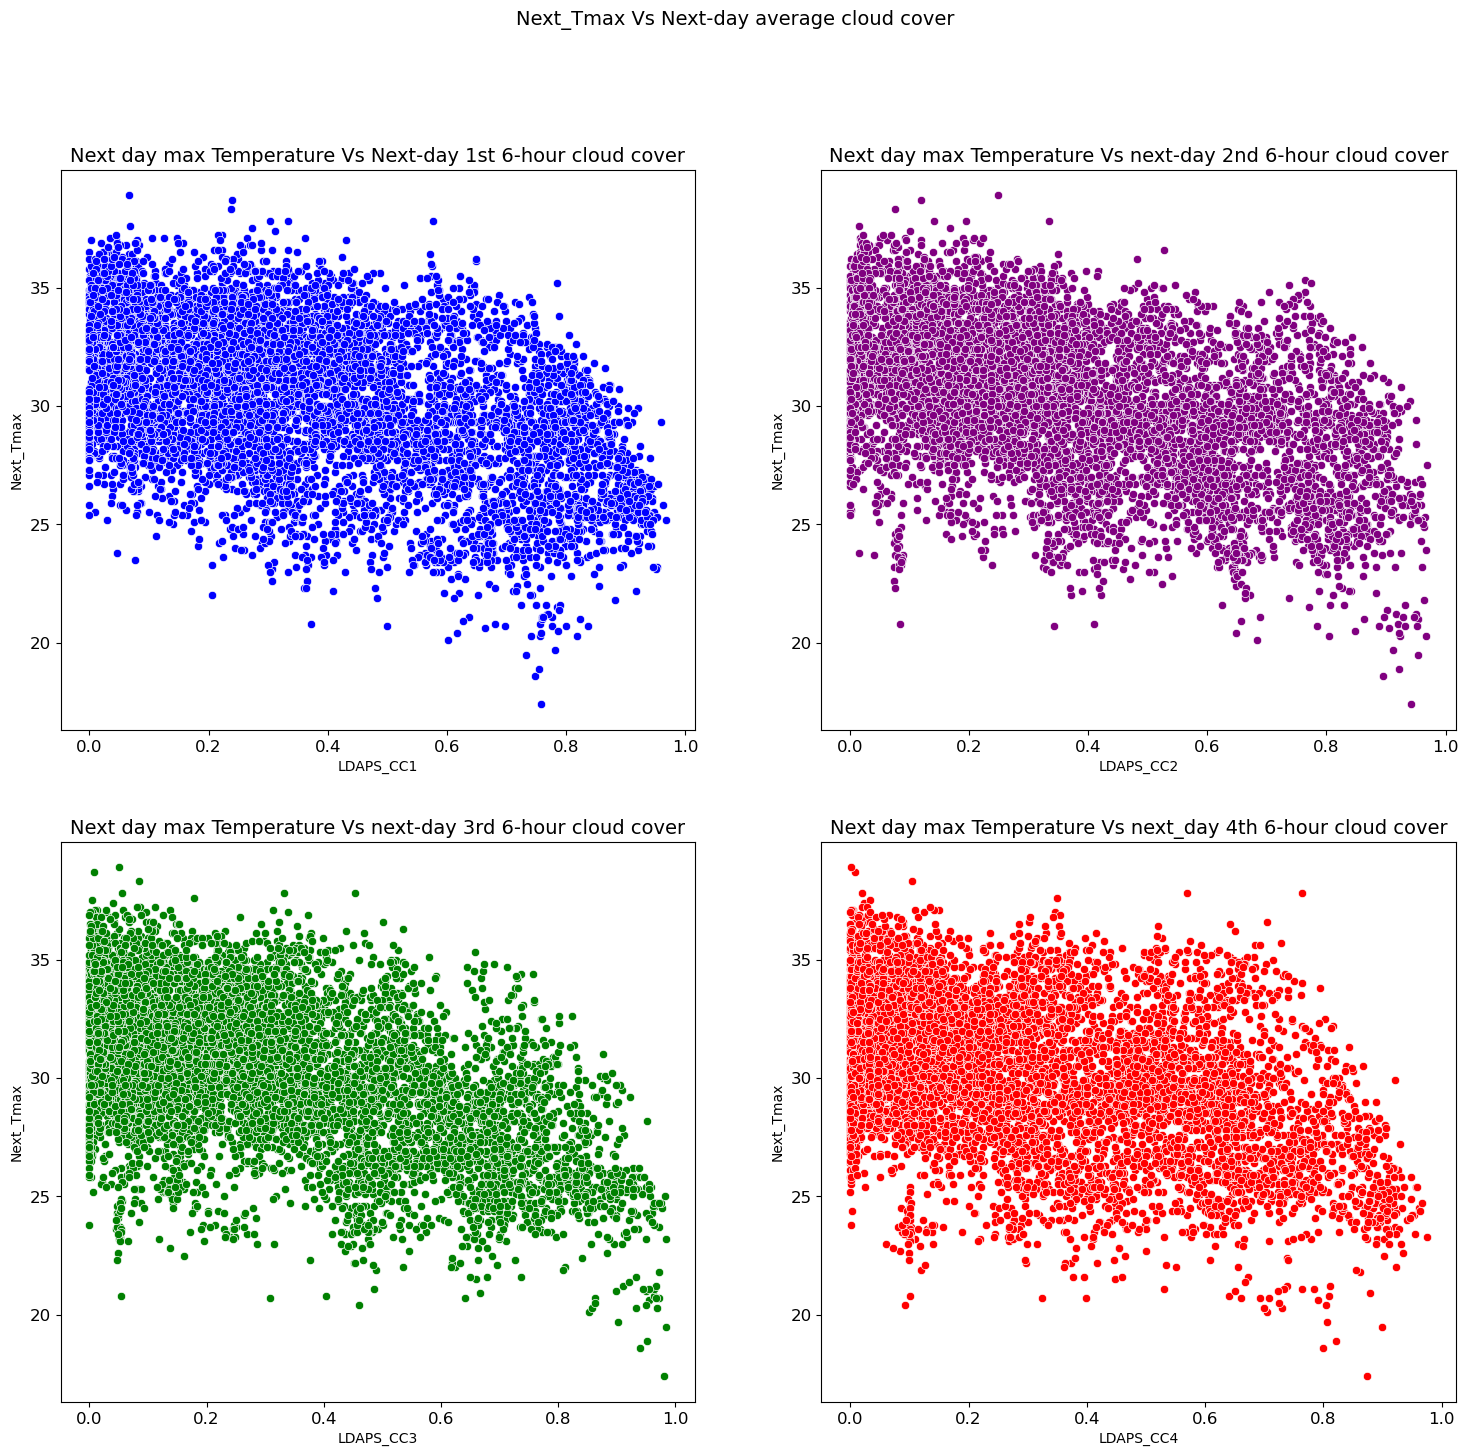

In [21]:
# Comparing Next day maximnum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmax Vs Next-day average cloud cover',fontsize=14)

plt.subplot(2,2,1)
plt.title('Next day max Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmax',data=data1,color="blue")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,2)
plt.title('Next day max Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmax',data=data1,color='purple')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
plt.title('Next day max Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmax',data=data1,color='green')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Next day max Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmax',data=data1,color="red")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Here we can see the negative correlation ,Next-day Temperature Maximum decreases as cloud cover increases beyond 0.6

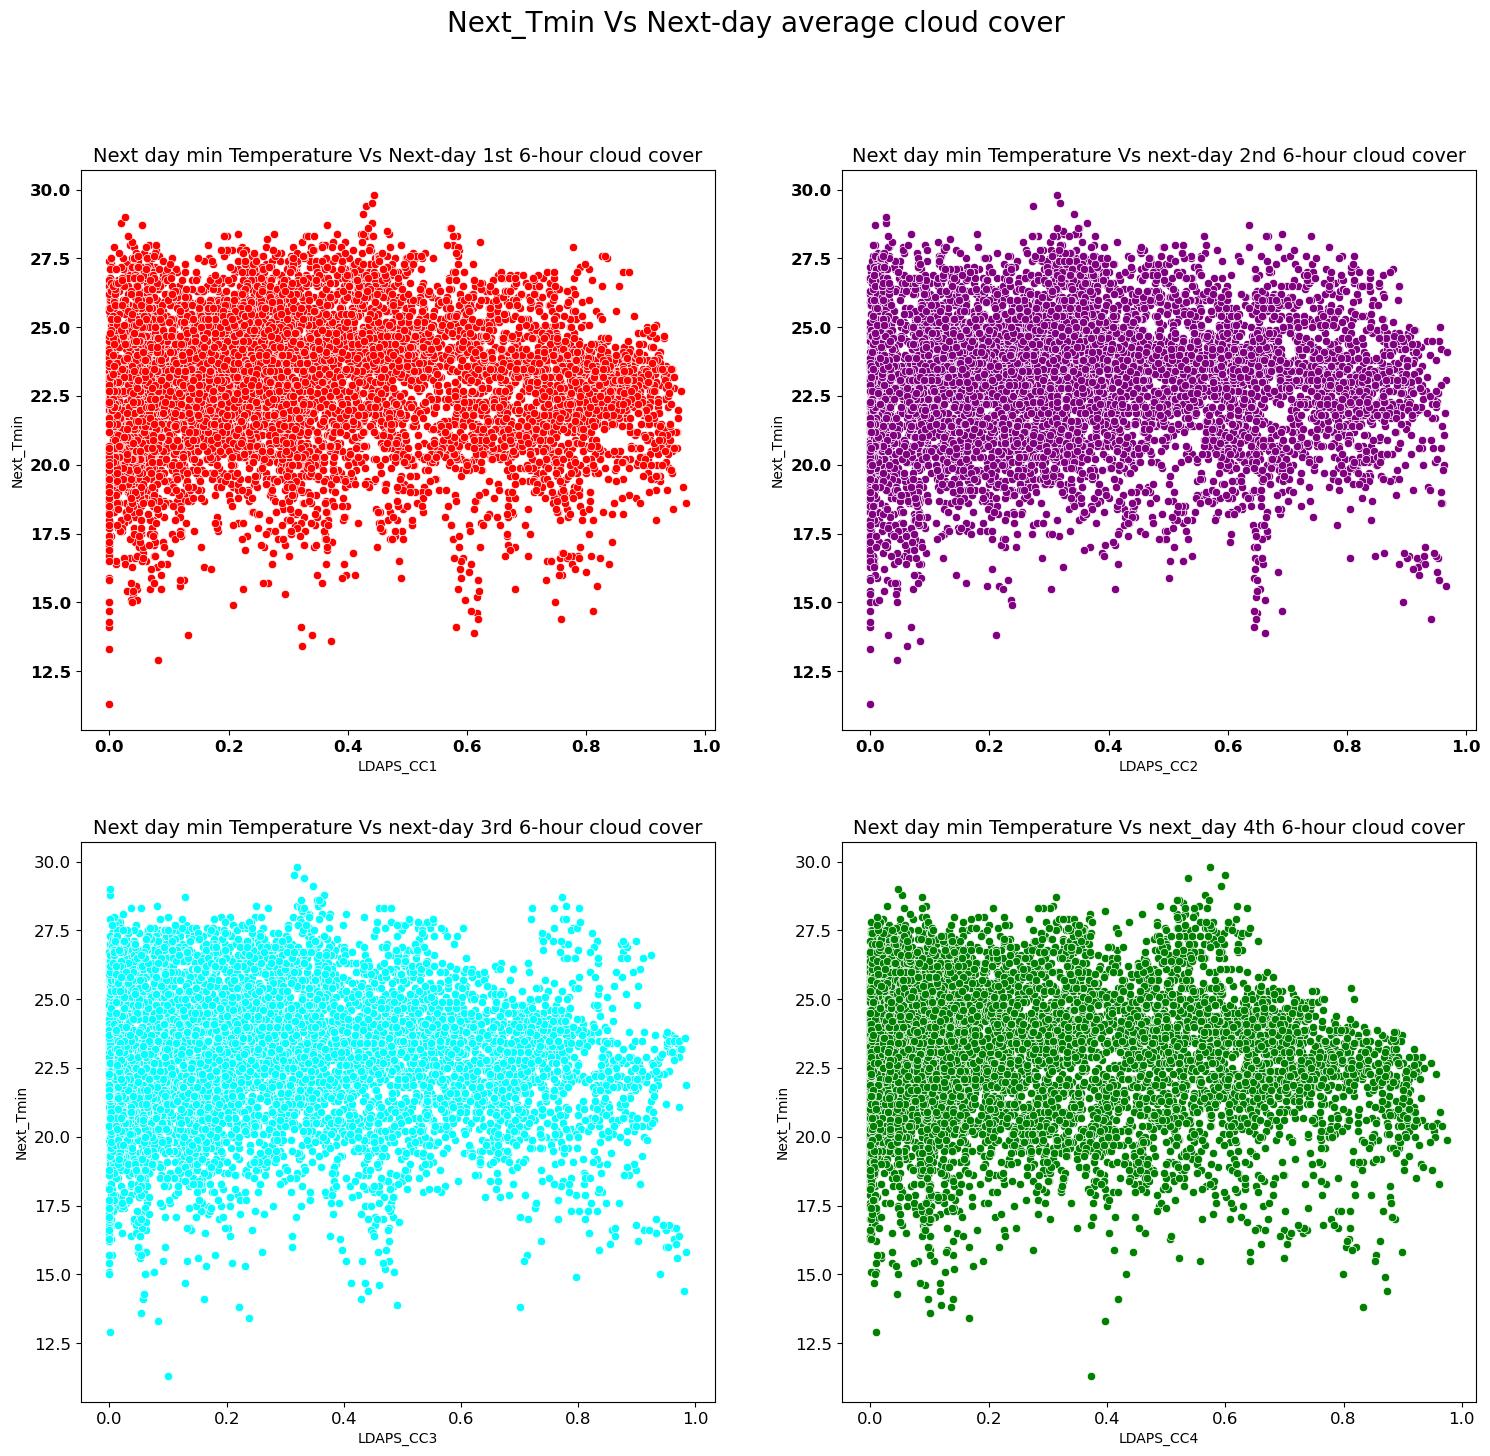

In [22]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Next_Tmin Vs Next-day average cloud cover',fontsize=20 )

plt.subplot(2,2,1)
plt.title('Next day min Temperature Vs Next-day 1st 6-hour cloud cover',fontsize=14 )
sns.scatterplot(x='LDAPS_CC1',y='Next_Tmin',data=data1,color="r")
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,2)
plt.title('Next day min Temperature Vs next-day 2nd 6-hour cloud cover',fontsize=14 )
sns.scatterplot(x='LDAPS_CC2',y='Next_Tmin',data=data1,color='purple')
plt.xticks(fontsize=12,fontweight ='bold')
plt.yticks(fontsize=12,fontweight ='bold')

plt.subplot(2,2,3)
plt.title('Next day min Temperature Vs next-day 3rd 6-hour cloud cover',fontsize=14 )
sns.scatterplot(x='LDAPS_CC3',y='Next_Tmin',data=data1,color='cyan')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Next day min Temperature Vs next_day 4th 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC4',y='Next_Tmin',data=data1,color="g")
plt.xticks(fontsize=12 )
plt.yticks(fontsize=12 )
plt.show()


There is no relation between Next_Tmin and Next-day average cloud cover

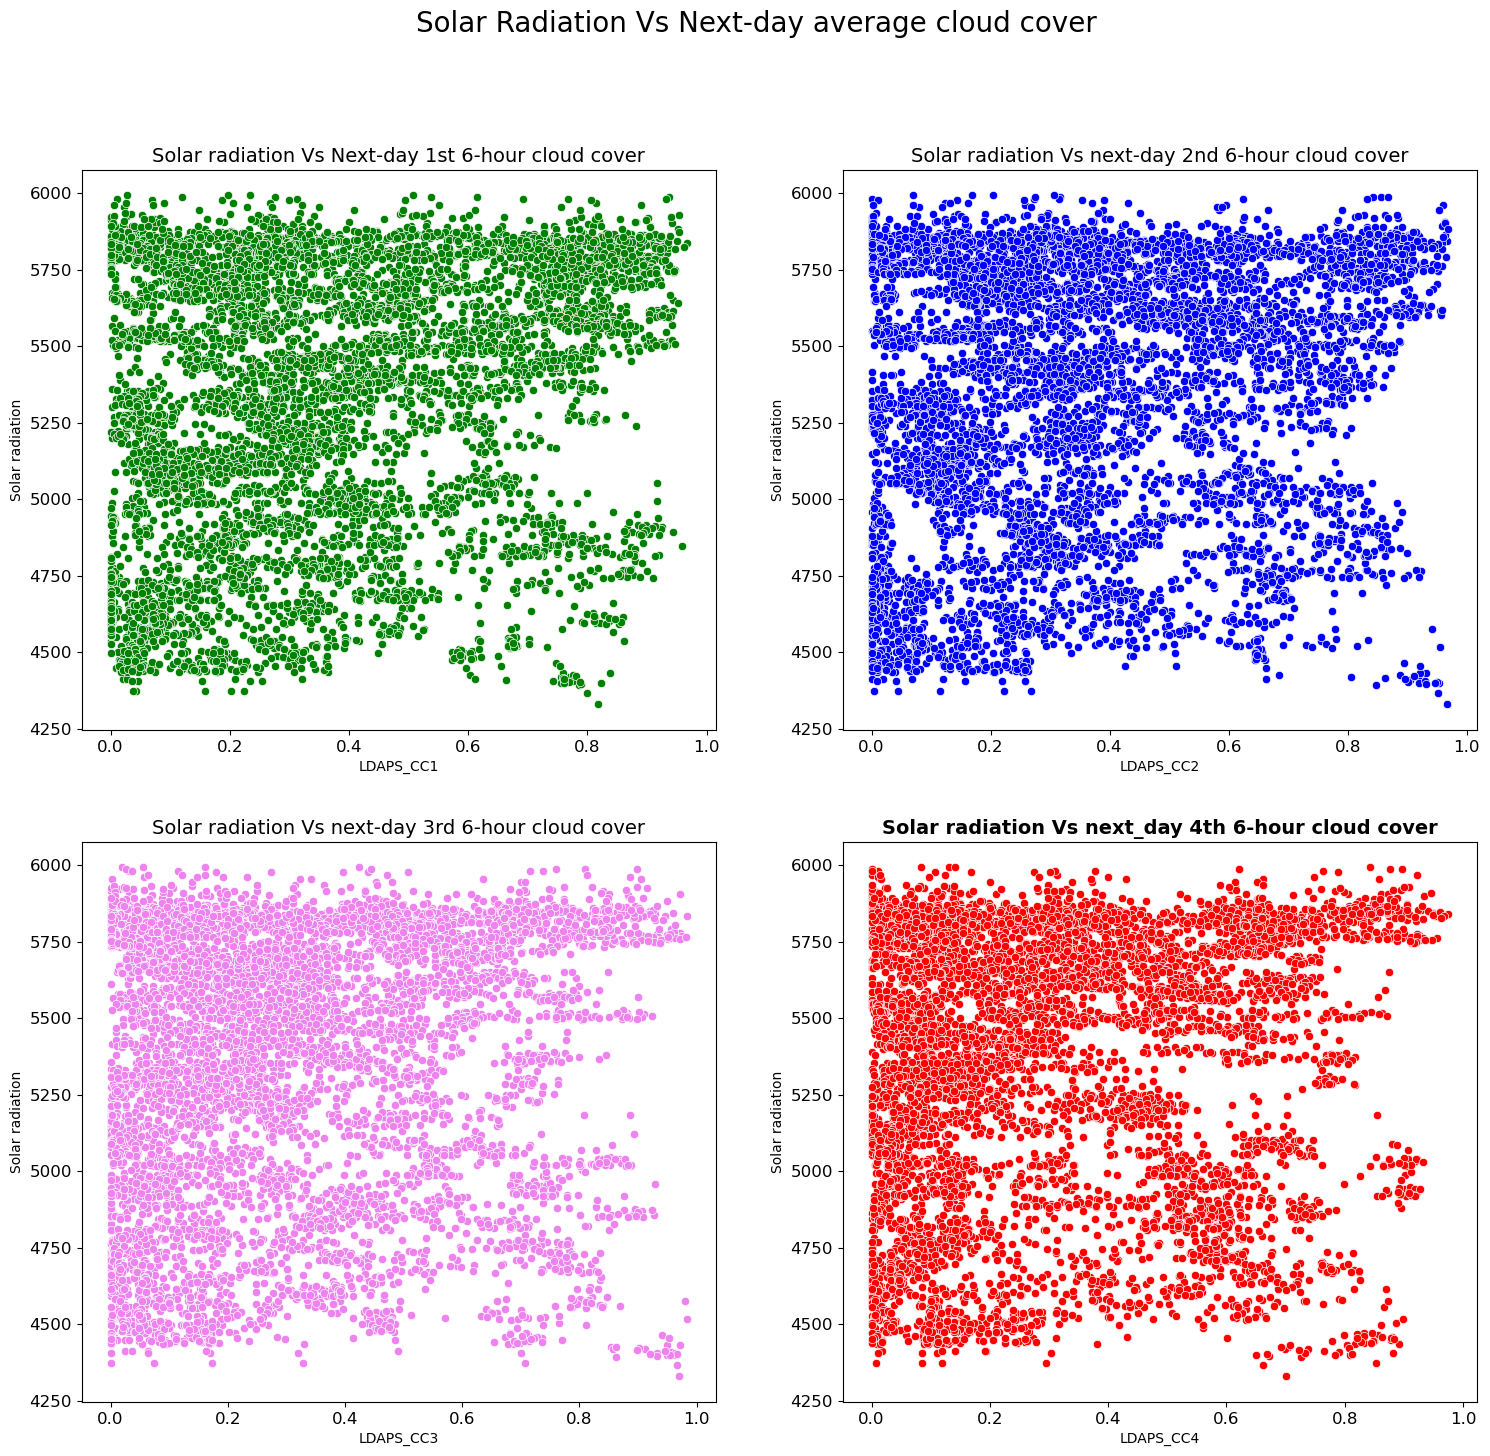

In [23]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day average cloud cover',fontsize=20)

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC1',y='Solar radiation',data=data1,color="g")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC2',y='Solar radiation',data=data1,color='b')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour cloud cover',fontsize=14)
sns.scatterplot(x='LDAPS_CC3',y='Solar radiation',data=data1,color='violet')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour cloud cover',fontsize=14, fontweight='bold')
sns.scatterplot(x='LDAPS_CC4',y='Solar radiation',data=data1,color="r")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

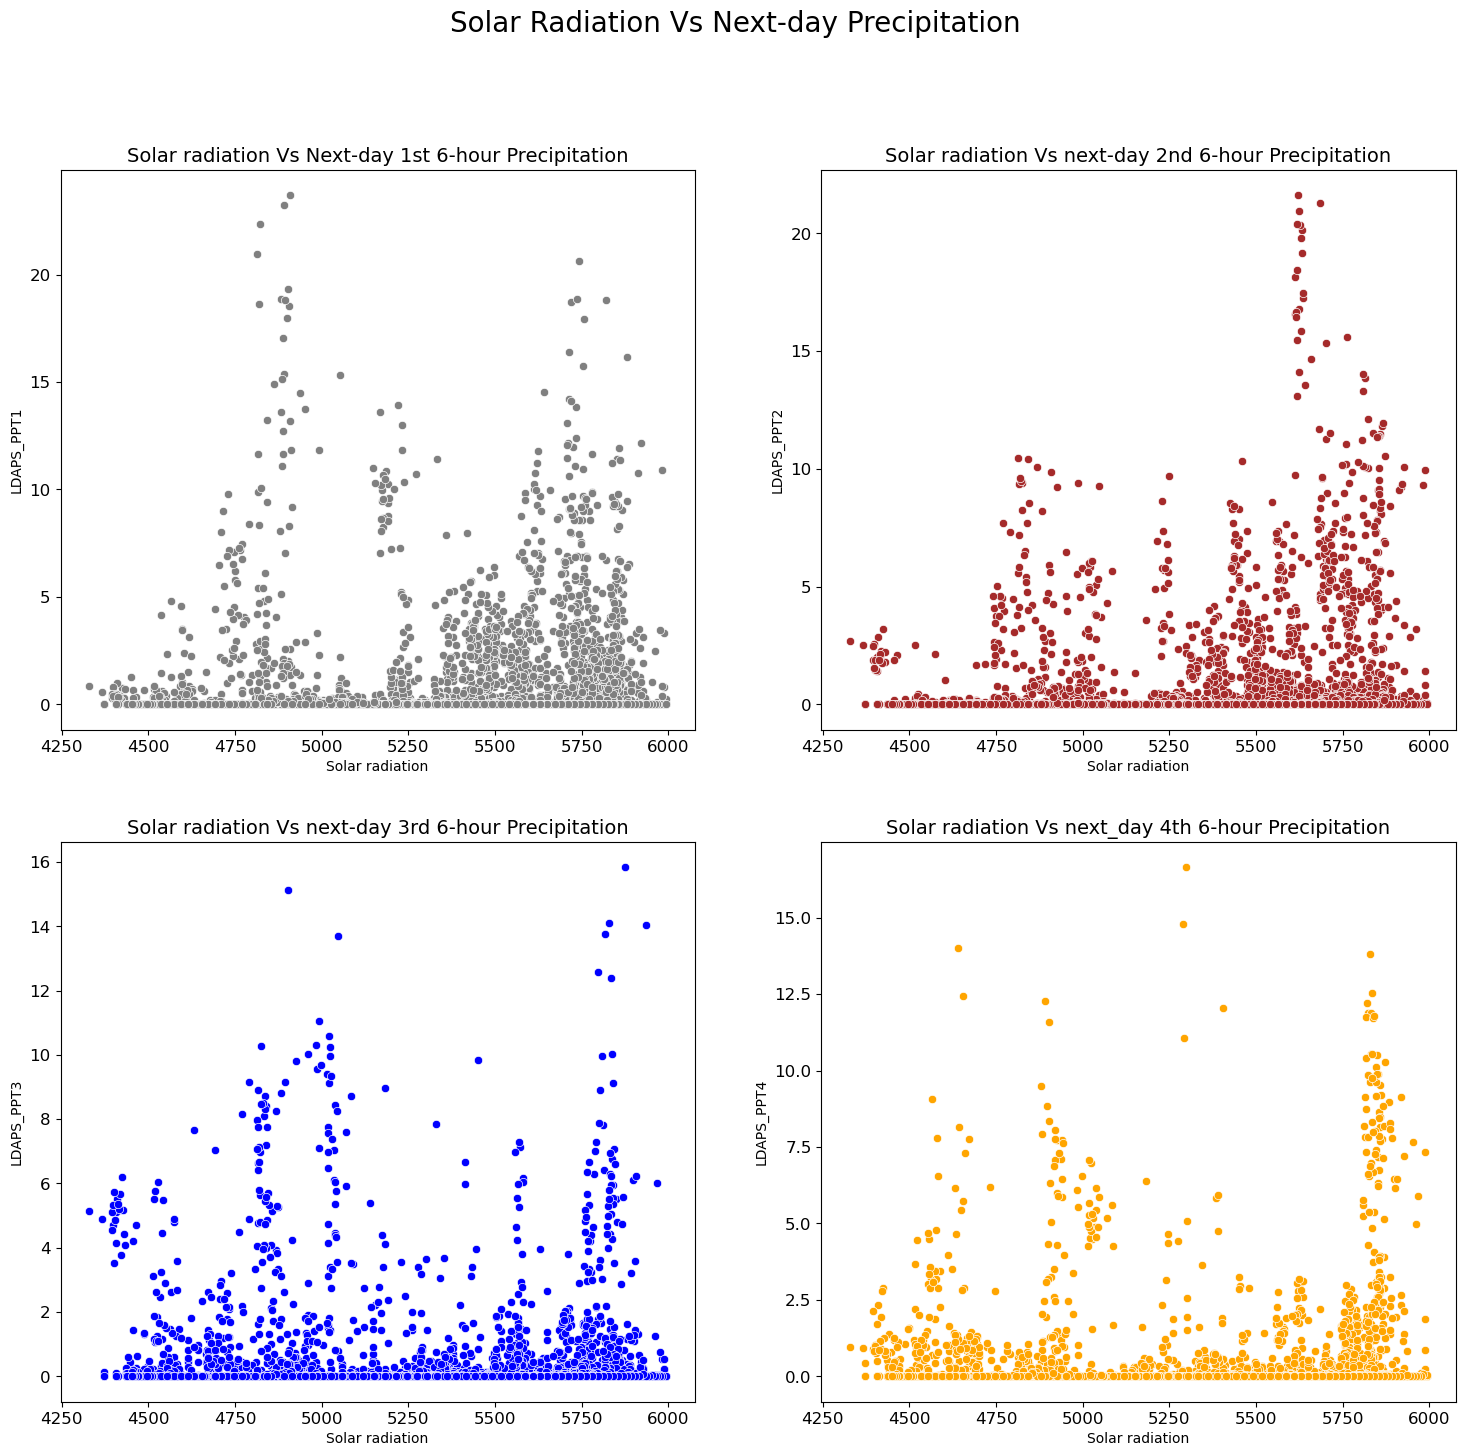

In [24]:
# Comparing Next day minimum temperature and next day average cloud cover

plt.figure(figsize=(18,16))
plt.suptitle('Solar Radiation Vs Next-day Precipitation',fontsize=20)

plt.subplot(2,2,1)
plt.title('Solar radiation Vs Next-day 1st 6-hour Precipitation',fontsize=14)
sns.scatterplot(y='LDAPS_PPT1',x='Solar radiation',data=data1,color="grey")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,2)
plt.title('Solar radiation Vs next-day 2nd 6-hour Precipitation',fontsize=14)
sns.scatterplot(y='LDAPS_PPT2',x='Solar radiation',data=data1,color='brown')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,3)
plt.title('Solar radiation Vs next-day 3rd 6-hour Precipitation',fontsize=14)
sns.scatterplot(y='LDAPS_PPT3',x='Solar radiation',data=data1,color='blue')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(2,2,4)
plt.title('Solar radiation Vs next_day 4th 6-hour Precipitation',fontsize=14)
sns.scatterplot(y='LDAPS_PPT4',x='Solar radiation',data=data1,color="orange")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

 solar radiation value greater than 5500w/m2 leads to higher amount of precipitation (normally greater than 8).
    
we can draw inference that for higher value of solar radiation cloud cover and precipitation followed each other. In other words higher precipitation means higher cloud cover.

In [26]:
# Sort columns by datatypes
data1.columns.to_series().groupby(data1.dtypes).groups

{float64: ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin'], datetime64[ns]: ['Date'], int64: ['Day', 'Month', 'Year']}

In [28]:
# Droping unnecessary columns\
df = data1.copy()
df.drop(['Date'], axis=1, inplace=True)

In [29]:
#Outliers Detection and Removal
df.shape

(7588, 27)

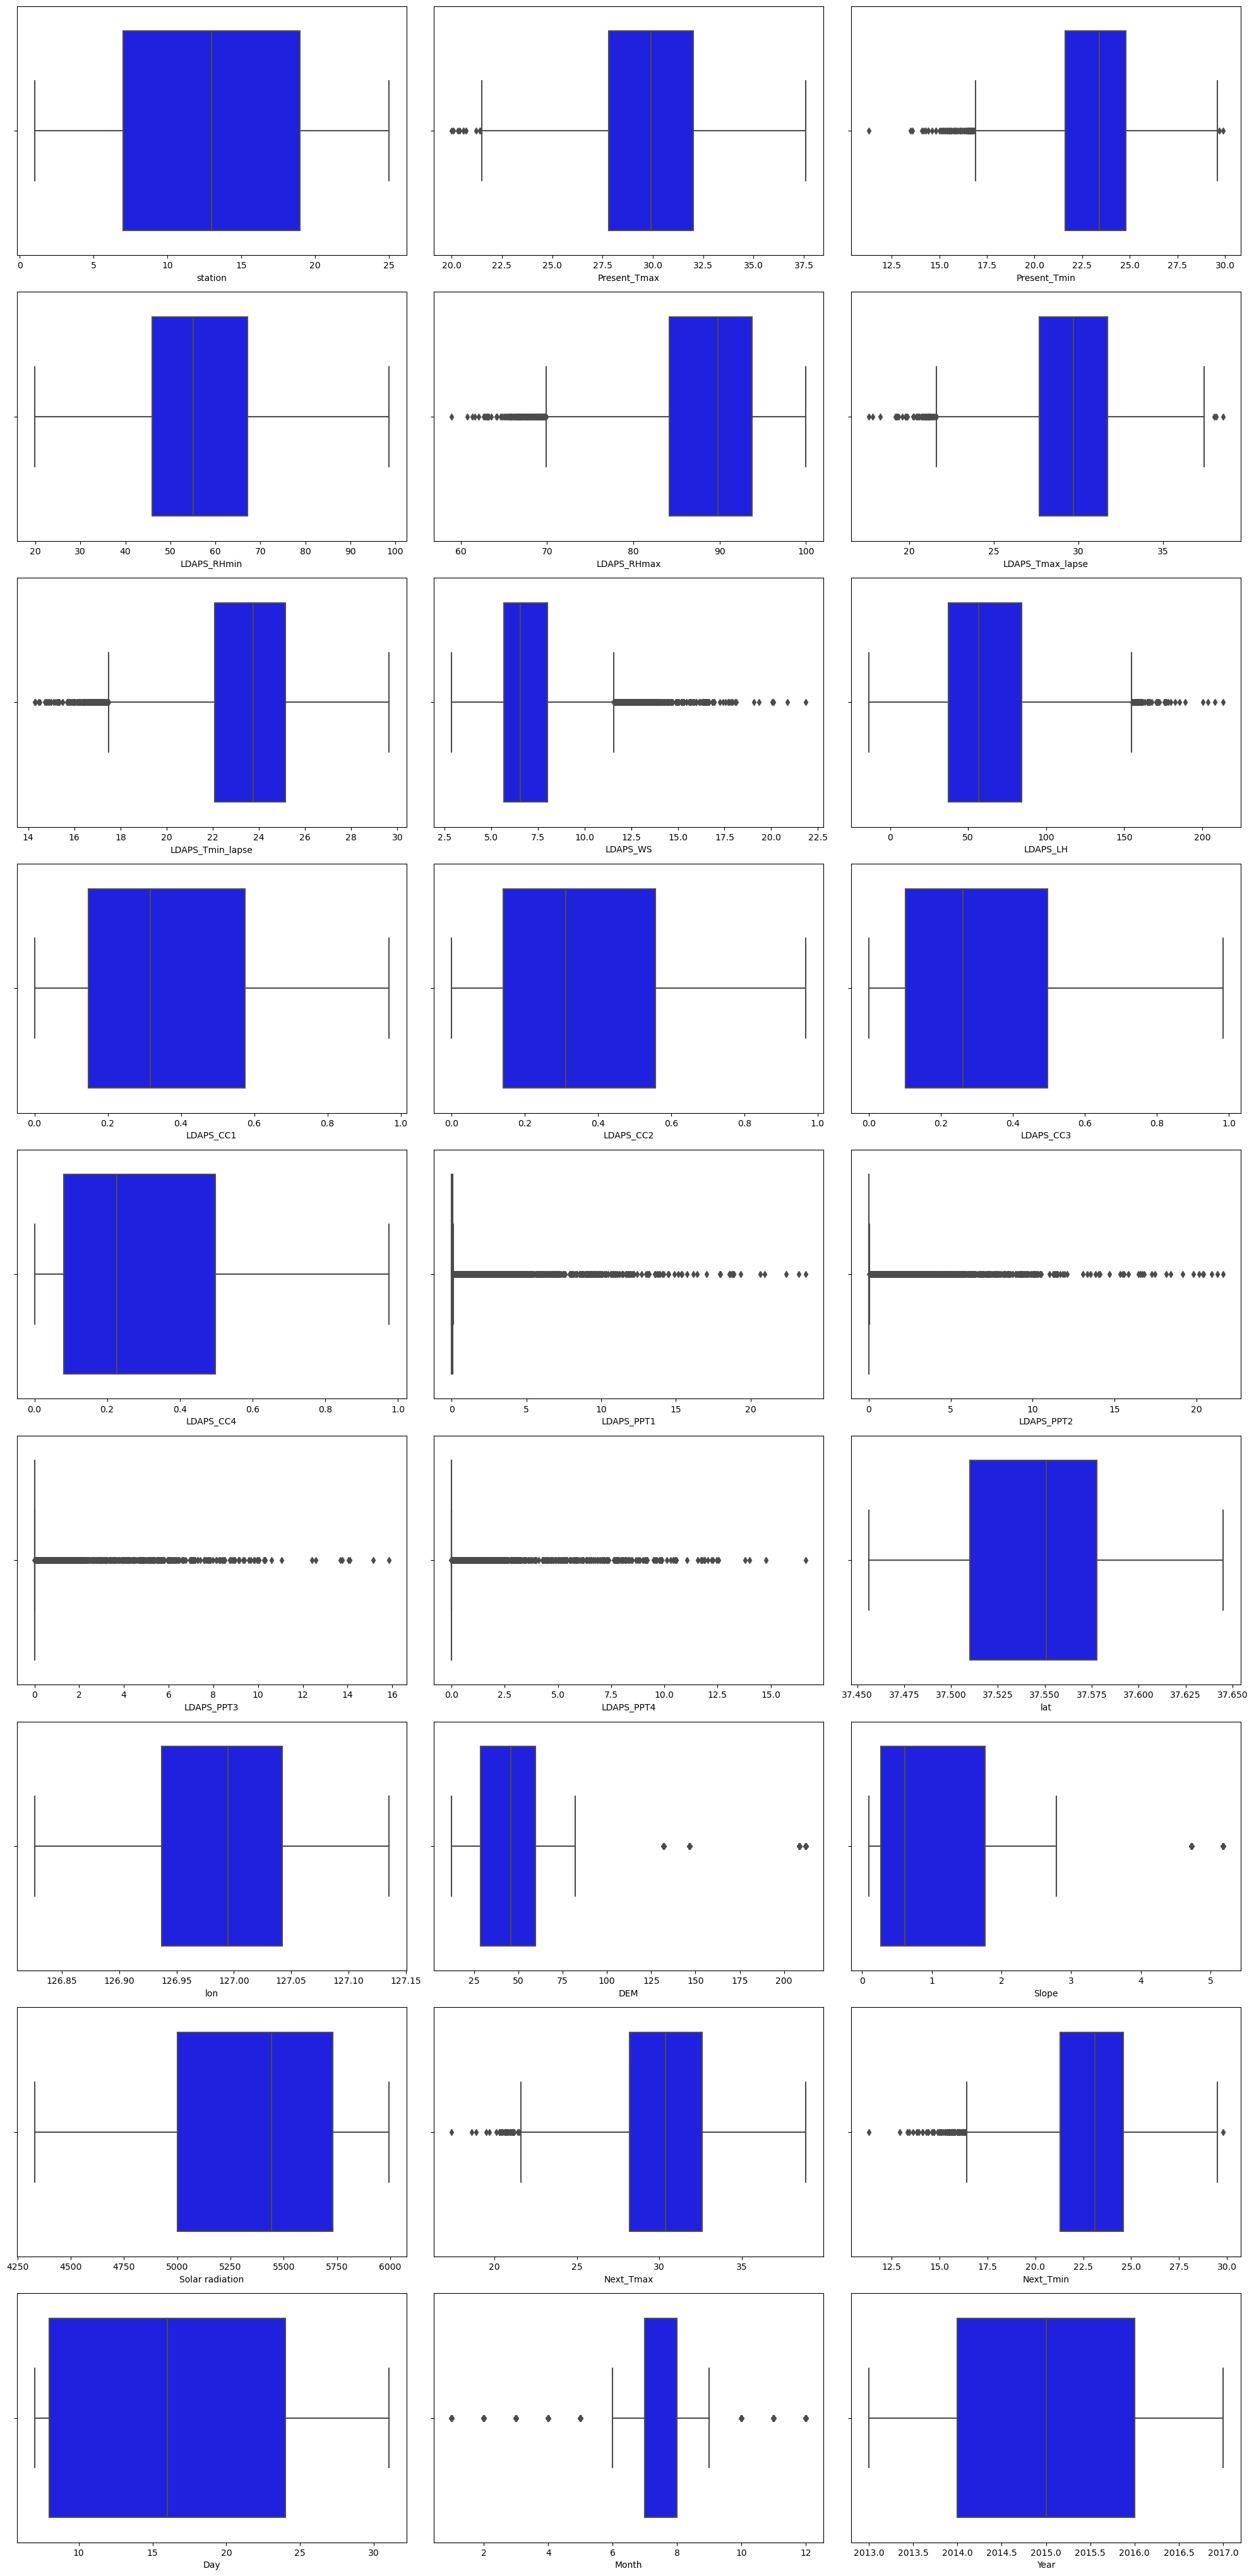

In [30]:
plt.figure(figsize=(20,45))
plotnumber=1

for column in df:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.boxplot(df[column],color='b')
        plt.xlabel(column)
    plotnumber+=1
plt.tight_layout()
plt.show()

We can see that the outliers are present.

In [31]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)

df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (7588, 27)
Shape of the dataframe after removing outliers:  (6739, 27)
Percentage of data loss post outlier removal:  11.188719030047443


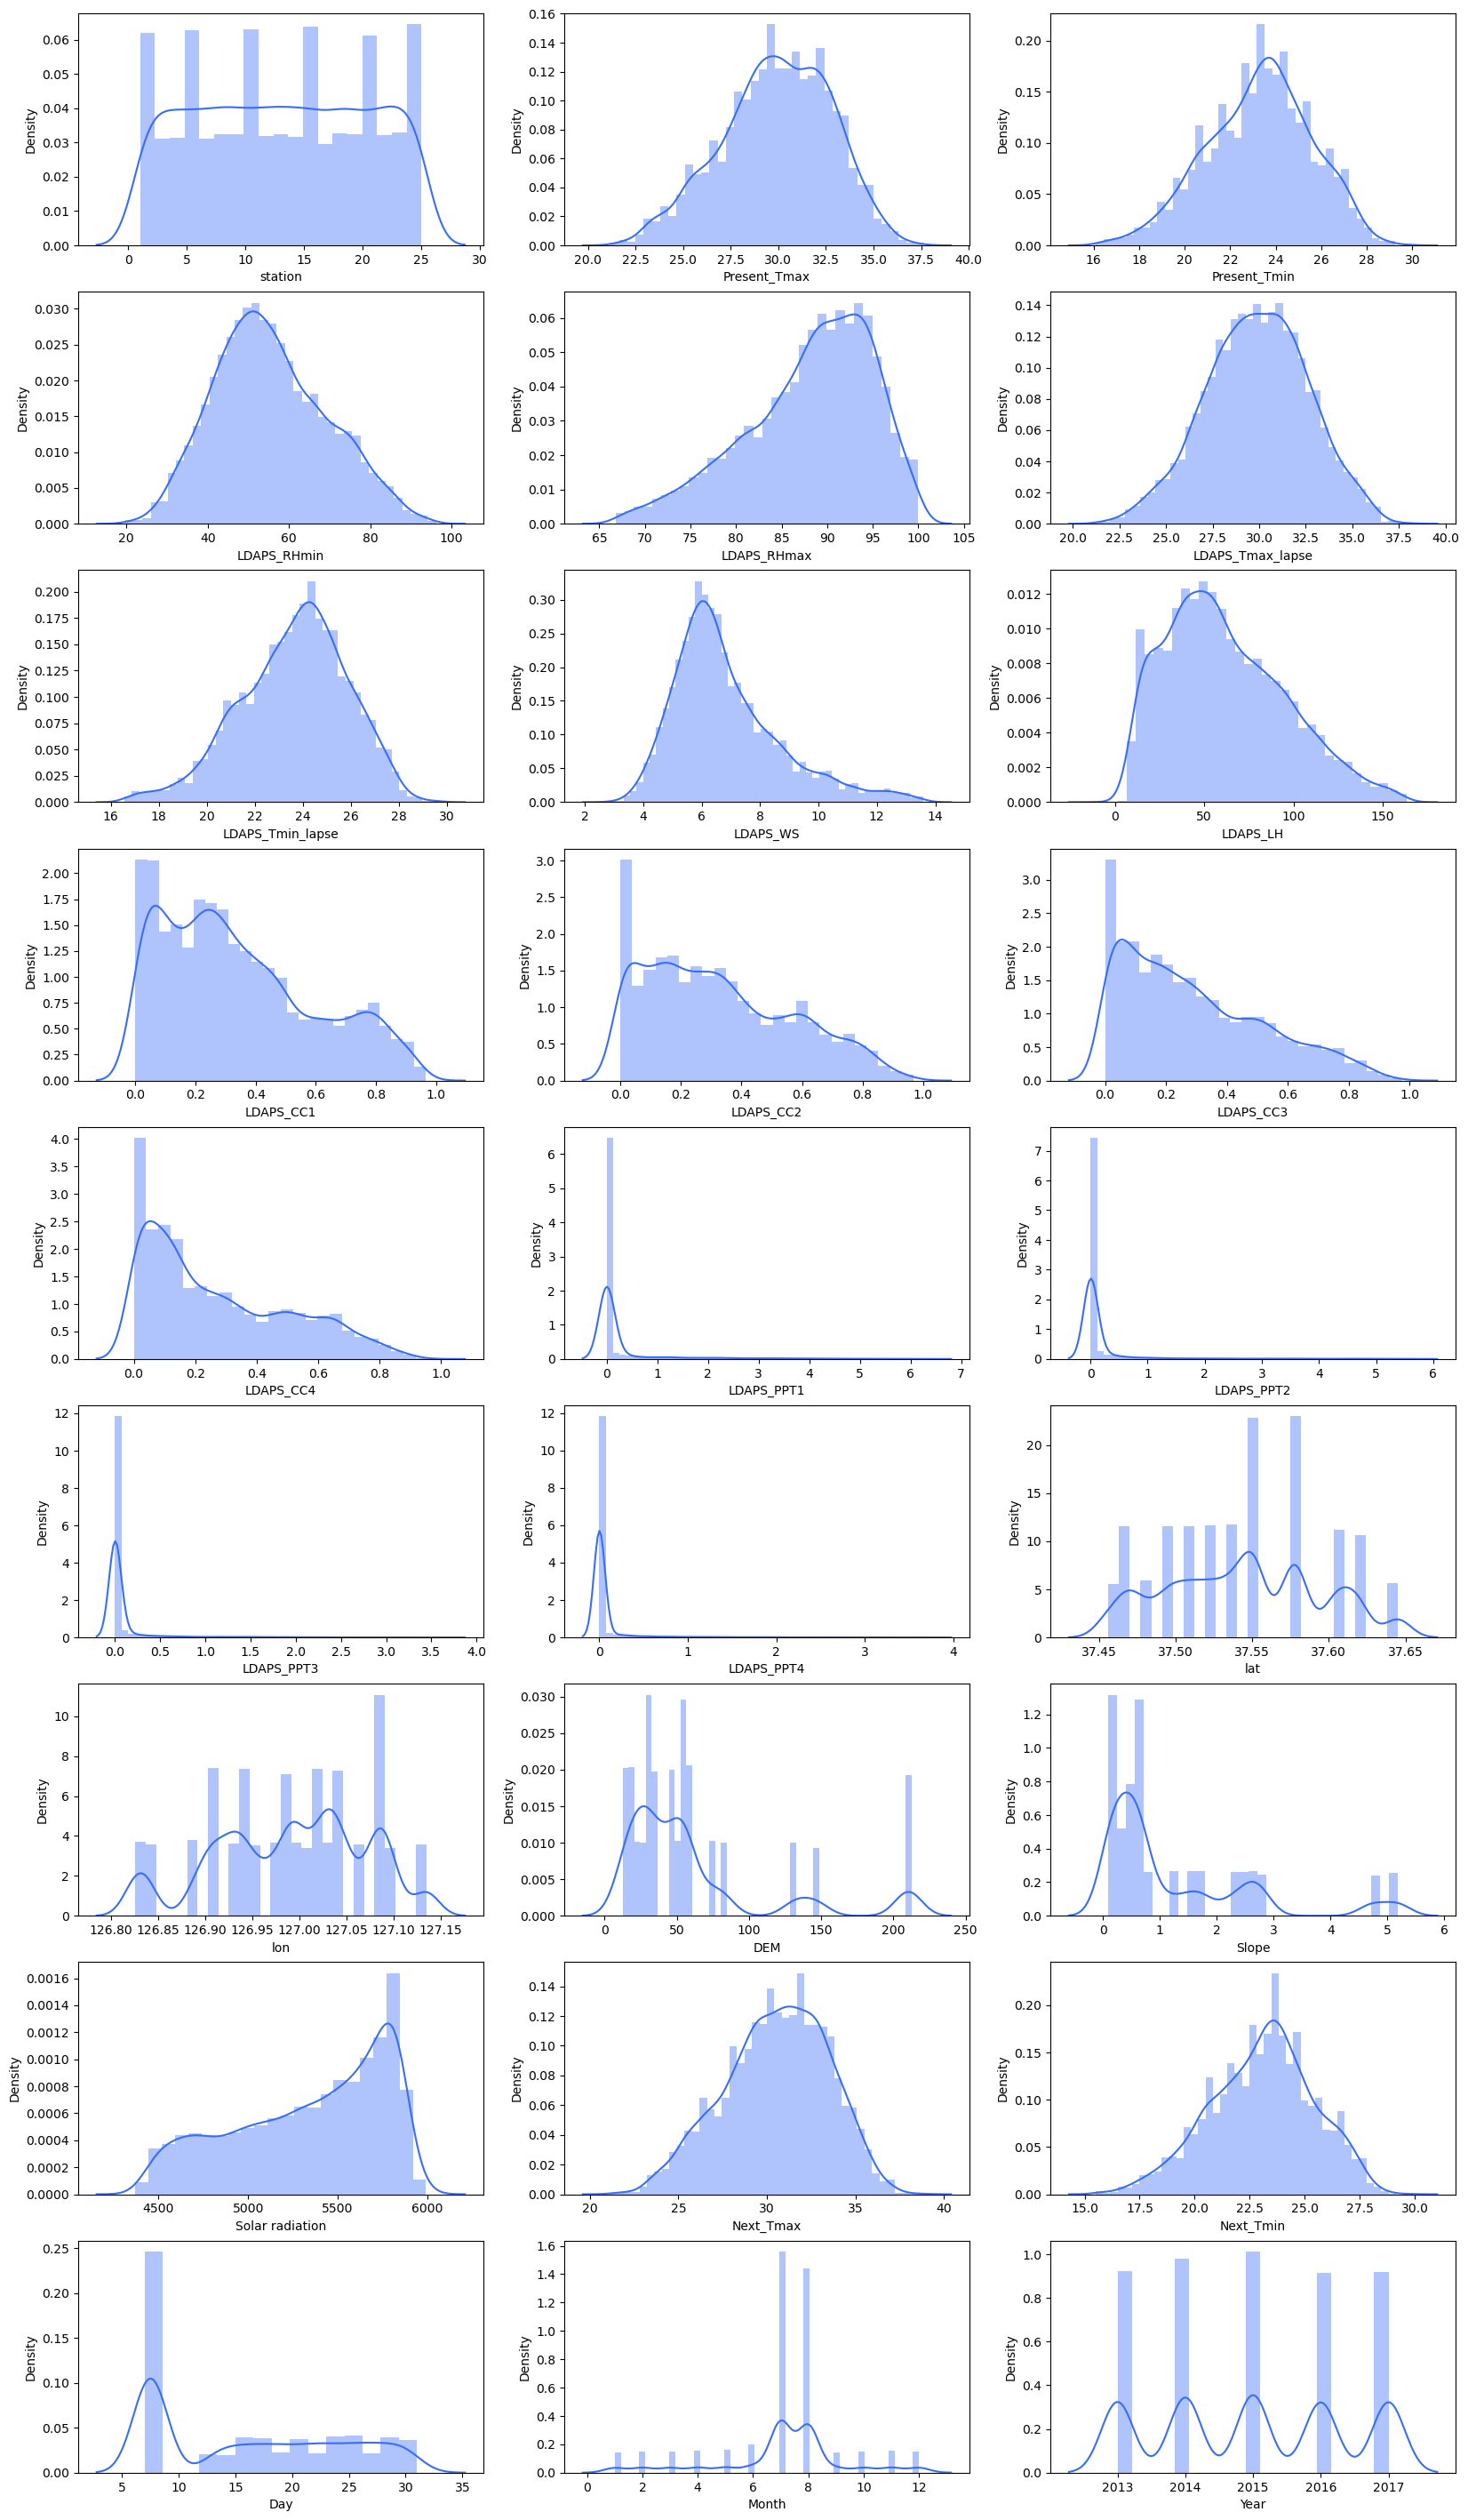

In [32]:
# lets check the skewness
plt.figure(figsize=(20,40))
sns.set_palette('rainbow')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col)
    plotnum+=1
plt.show()

In [33]:
df.skew()

station            -0.001594
Present_Tmax       -0.269936
Present_Tmin       -0.221250
LDAPS_RHmin         0.309567
LDAPS_RHmax        -0.686083
LDAPS_Tmax_lapse   -0.110563
LDAPS_Tmin_lapse   -0.379269
LDAPS_WS            1.085685
LDAPS_LH            0.567050
LDAPS_CC1           0.594835
LDAPS_CC2           0.505774
LDAPS_CC3           0.701288
LDAPS_CC4           0.708754
LDAPS_PPT1          3.724580
LDAPS_PPT2          4.854967
LDAPS_PPT3          5.516862
LDAPS_PPT4          5.924324
lat                 0.106983
lon                -0.277547
DEM                 1.764698
Slope               1.590130
Solar radiation    -0.520157
Next_Tmax          -0.267526
Next_Tmin          -0.234328
Day                 0.256528
Month              -0.680725
Year                0.025066
dtype: float64

In [34]:
# Making the skew less than or equal to +0.5 and -0.5 for better prediction using yeo-johnson method
skew=['LDAPS_RHmax','LDAPS_Tmin_lapse','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4',
      'LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3','LDAPS_PPT4','DEM','Slope','Solar radiation','Month']

# Importing Powertransformer
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[skew] = scaler.fit_transform(df[skew].values)

In [35]:
df.corr()

station  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
station           1.000000      0.110291      0.133638    -0.069582   
Present_Tmax      0.110291      1.000000      0.610428    -0.154266   
Present_Tmin      0.133638      0.610428      1.000000     0.151385   
LDAPS_RHmin      -0.069582     -0.154266      0.151385     1.000000   
LDAPS_RHmax      -0.182354     -0.320074     -0.053421     0.566069   
LDAPS_Tmax_lapse  0.066863      0.540680      0.441577    -0.555583   
LDAPS_Tmin_lapse  0.108664      0.623443      0.764041     0.114069   
LDAPS_WS          0.030231     -0.071596      0.034364     0.171684   
LDAPS_LH         -0.135717      0.119022     -0.008556    -0.002412   
LDAPS_CC1         0.008671     -0.290078      0.090828     0.574389   
LDAPS_CC2         0.006380     -0.157917      0.117894     0.713238   
LDAPS_CC3         0.006303     -0.061417      0.043629     0.636195   
LDAPS_CC4         0.011510     -0.049978      0.000193     0.459528   
LDAPS_PPT1       -0.001774     -0.190222      0.068506     0.410985   
LDAPS_PPT2       -0.006798     -0.097425      0.090113     0.510241   
LDAPS_PPT3       -0.004884     -0.022348      0.035889     0.405612   
LDAPS_PPT4       -0.000285     -0.021344     -0.063495     0.244139   
lat              -0.241811     -0.052041     -0.072707     0.090054   
lon              -0.122829      0.011132     -0.043201    -0.093969   
DEM              -0.326019     -0.130892     -0.238916     0.057460   
Slope            -0.146034     -0.092409     -0.157839     0.083910   
Solar radiation  -0.034787     -0.099696     -0.047145     0.229070   
Next_Tmax         0.106378      0.586943      0.438813    -0.433872   
Next_Tmin         0.129110      0.615950      0.785946     0.134518   
Day               0.005179     -0.136914     -0.076877    -0.070194   
Month             0.003494      0.039443     -0.019387    -0.070498   
Year              0.006658      0.099185      0.099222     0.001709   

                  LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  \
station             -0.182354          0.066863          0.108664  0.030231   
Present_Tmax        -0.320074          0.540680          0.623443 -0.071596   
Present_Tmin        -0.053421          0.441577          0.764041  0.034364   
LDAPS_RHmin          0.566069         -0.555583          0.114069  0.171684   
LDAPS_RHmax          1.000000         -0.403634         -0.182113  0.060965   
LDAPS_Tmax_lapse    -0.403634          1.000000          0.624572 -0.154400   
LDAPS_Tmin_lapse    -0.182113          0.624572          1.000000 -0.002164   
LDAPS_WS             0.060965         -0.154400         -0.002164  1.000000   
LDAPS_LH             0.285942          0.005878         -0.143246 -0.056362   
LDAPS_CC1            0.425827         -0.416255          0.023128  0.203057   
LDAPS_CC2            0.372085         -0.492392          0.087752  0.156336   
LDAPS_CC3            0.143375         -0.468317          0.032023  0.065764   
LDAPS_CC4            0.046555         -0.367547         -0.017483  0.090955   
LDAPS_PPT1           0.420202         -0.307565         -0.054475  0.197126   
LDAPS_PPT2           0.368154         -0.344808          0.021320  0.166155   
LDAPS_PPT3           0.219383         -0.285371         -0.018357  0.089355   
LDAPS_PPT4           0.118163         -0.207369         -0.084124  0.167950   
lat                  0.232258         -0.038285         -0.091796 -0.027463   
lon                  0.013059          0.106354         -0.025047 -0.077686   
DEM                  0.174176         -0.110286         -0.174769  0.113157   
Slope                0.209222         -0.105094         -0.160165  0.095385   
Solar radiation      0.154031         -0.034699          0.009890  0.164626   
Next_Tmax           -0.323446          0.816861          0.550810 -0.205979   
Next_Tmin           -0.110402          0.553227          0.873678  0.023330   
Day                 -0.009056         -0.140514        

Temperature related feature are moderately or highly correlated with Target Feature.

## Machine Learning Model Building For Next_Tmax

In [36]:
# Standard scaler
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmax'], axis =1)
Y = df['Next_Tmax']

In [37]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [38]:
# Checking the multicolinerity 
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.290528           station
1     2.848829      Present_Tmax
2     3.382429      Present_Tmin
3     6.037396       LDAPS_RHmin
4     2.611983       LDAPS_RHmax
5     6.621815  LDAPS_Tmax_lapse
6     8.203124  LDAPS_Tmin_lapse
7     1.223949          LDAPS_WS
8     1.520712          LDAPS_LH
9     4.873088         LDAPS_CC1
10    5.530661         LDAPS_CC2
11    4.567147         LDAPS_CC3
12    2.791604         LDAPS_CC4
13    2.601114        LDAPS_PPT1
14    2.174143        LDAPS_PPT2
15    1.592100        LDAPS_PPT3
16    1.600327        LDAPS_PPT4
17    1.296703               lat
18    1.224341               lon
19    3.378294               DEM
20    2.874180             Slope
21    1.484989   Solar radiation
22    5.651856         Next_Tmin
23    1.259087               Day
24    1.122102             Month
25    1.125621              Year

Independent feature VIF is within permissible limit of 10

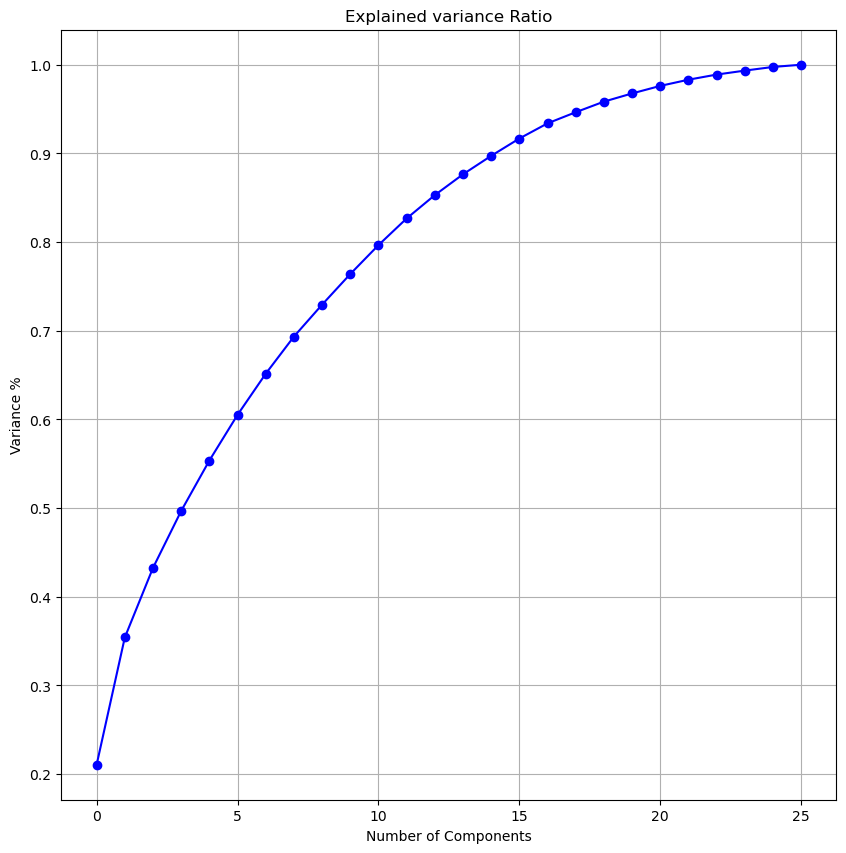

In [39]:
# PCA
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

AS per the graph, we can see that 15 principal components attribute for 90% of variation in the data. We shall pick the first 15 components for our prediction.

In [40]:
pca_new = PCA(n_components=15)
x_new = pca_new.fit_transform(X_scale)

In [41]:
principle_x=pd.DataFrame(x_new,columns=np.arange(15))

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  Ridge
from sklearn.linear_model import  Lasso

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 15)
Training target vector size: (4515,)
Test feature matrix size: (2224, 15)
Test target vector size: (2224,)


In [46]:
#Finding best Random state
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8017871901295115 on Random_state 108


In [47]:
#Linear Regression Base Model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=108, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [31.9384742  30.1689071  29.12601139 ... 25.92948275 25.18124804
 32.674621  ]


Actual Wins:
 934     32.0
4582    30.1
7277    27.8
4776    27.6
3755    29.8
        ... 
7096    36.7
7148    35.4
7667    28.4
5063    24.0
4239    32.6
Name: Next_Tmax, Length: 2224, dtype: float64


In [48]:
print( 'Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print( 'R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

Error :
Mean absolute error : 1.015611796483966
Mean squared error : 1.746148722709001
Root Mean Squared Error: 1.3214192077872189


R2 Score :
0.8017871901295115


In [49]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('\033[1m'+'Cross Validation Score :',lin_reg,":"+'\033[0m\n')
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :

Mean CV Score : 0.6691977299722439


In [50]:
from sklearn.ensemble import BaggingRegressor

In [52]:
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
model = [rf,XT,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('\033[1m'+' Error of ', m, ':' +'\033[0m')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('\033[1m'+' R2 Score :'+'\033[0m')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



 Error of  RandomForestRegressor() :
Mean absolute error : 0.7074037769784175
Mean squared error : 0.8839182526978417
Root Mean Squared Error: 0.9401692681096536


 R2 Score :
0.8996626585785673


 Error of  ExtraTreesRegressor() :
Mean absolute error : 0.6014829136690647
Mean squared error : 0.6370572023381295
Root Mean Squared Error: 0.7981586323144851


 R2 Score :
0.9276849122405958


 Error of  DecisionTreeRegressor() :
Mean absolute error : 1.0537769784172661
Mean squared error : 2.1065017985611507
Root Mean Squared Error: 1.45137927453893


 R2 Score :
0.760881971243393


 Error of  AdaBoostRegressor() :
Mean absolute error : 1.164649500731292
Mean squared error : 2.0191276852010778
Root Mean Squared Error: 1.4209601279420467


 R2 Score :
0.7708001805538659


 Error of  GradientBoostingRegressor() :
Mean absolute error : 0.8352314290390133
Mean squared error : 1.1565943347824543
Root Mean Squared Error: 1.0754507588832016


 R2 Score :
0.8687100302534059


In [53]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score :',m,":")
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :
Mean CV Score : 0.68861439573273


Cross Validation Score : ExtraTreesRegressor() :
Mean CV Score : 0.6926423475437529


Cross Validation Score : DecisionTreeRegressor() :
Mean CV Score : 0.4267535947477709


Cross Validation Score : AdaBoostRegressor() :
Mean CV Score : 0.6438754656283271


Cross Validation Score : GradientBoostingRegressor() :
Mean CV Score : 0.7051532062459813


In [69]:
Final_mod =  ExtraTreesRegressor()
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print(' Error in Final Model :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print(' R2 Score of Final Model :')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.5994410971223025
Mean squared error : 0.6351162981115116
Root Mean Squared Error: 0.7969418411098212


 R2 Score of Final Model :
0.9279052325806929




In [70]:
import joblib
joblib.dump(Final_mod,'Next_Tmax_Forecast_Final.pkl')

['Next_Tmax_Forecast_Final.pkl']

## Machine Learning Model Building For Next_Tmin

In [72]:
# Splitting data in target and dependent feature
X = df.drop(['Next_Tmin'], axis =1)
Y = df['Next_Tmin']

In [73]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (4515, 26)
Training target vector size: (4515,)
Test feature matrix size: (2224, 26)
Test target vector size: (2224,)


In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
maxR2_score=0
maxRS=0
for i in range(1,500):
    X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=i, test_size=.33)
    lin_reg=LinearRegression()
    lin_reg.fit(X_train,Y_train)
    y_pred=lin_reg.predict(X_test)
    R2=r2_score(Y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
print('Best R2 Score is', maxR2_score ,'on Random_state', maxRS)

Best R2 Score is 0.8506252552203425 on Random_state 43


In [76]:
#Linear Regression Base Model
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, random_state=43, test_size=.33)
lin_reg=LinearRegression()
lin_reg.fit(X_train,Y_train)
lin_reg.score(X_train,Y_train)
y_pred=lin_reg.predict(X_test)
print('\033[1m'+'Predicted Wins:'+'\033[0m\n',y_pred)
print('\n')
print('\033[1m'+'Actual Wins:'+'\033[0m\n',Y_test)

Predicted Wins:
 [23.46238346 24.67671768 23.16276446 ... 22.52790743 26.49278455
 25.3726423 ]


Actual Wins:
 5006    23.0
947     25.6
3726    23.0
715     22.1
4242    24.0
        ... 
4097    24.6
3186    17.1
6641    23.1
3854    26.2
1190    25.7
Name: Next_Tmin, Length: 2224, dtype: float64


In [79]:
#Linear Regression Evaluation Matrix
print( 'Error :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
from sklearn.metrics import r2_score
print(' R2 Score :')
print(r2_score(Y_test,y_pred,multioutput='variance_weighted'))

Error :
Mean absolute error : 0.7376270230353691
Mean squared error : 0.8611627720034198
Root Mean Squared Error: 0.9279885624313587


 R2 Score :
0.8506252552203426


In [80]:
# Cross Validation
from sklearn.model_selection import cross_val_score
score = cross_val_score(lin_reg, X_scale, Y, cv =3)
print('Cross Validation Score :',lin_reg,":")
print("Mean CV Score :",score.mean())

Cross Validation Score : LinearRegression() :
Mean CV Score : 0.7876378063969721


In [82]:
#Applying other ML Models
rf = RandomForestRegressor()
dtc = DecisionTreeRegressor()
XT = ExtraTreesRegressor()
BR = BaggingRegressor()
adb=AdaBoostRegressor()
gradb=GradientBoostingRegressor()
model = [rf,XT,dtc,adb,gradb]

for m in model:
    m.fit(X_train,Y_train)
    m.score(X_train,Y_train)
    y_pred = m.predict(X_test)
    print('\n')                                        
    print('Error of ', m, ':')
    print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
    print('Mean squared error :', mean_squared_error(Y_test,y_pred))
    print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
    print('\n')

    print('R2 Score :')
    print(r2_score(Y_test,y_pred)) 
    print('==============================================================================================================')



Error of  RandomForestRegressor() :
Mean absolute error : 0.5523138489208633
Mean squared error : 0.5216269064748204
Root Mean Squared Error: 0.7222374308181627


R2 Score :
0.9095201411881642


Error of  ExtraTreesRegressor() :
Mean absolute error : 0.5126434352517985
Mean squared error : 0.45841137365107903
Root Mean Squared Error: 0.6770608345275032


R2 Score :
0.9204853203489964


Error of  DecisionTreeRegressor() :
Mean absolute error : 0.827473021582734
Mean squared error : 1.2354361510791365
Root Mean Squared Error: 1.111501754870021


R2 Score :
0.7857049030002942


Error of  AdaBoostRegressor() :
Mean absolute error : 0.8400908484943808
Mean squared error : 1.0777763465003571
Root Mean Squared Error: 1.038160077493041


R2 Score :
0.8130521059177843


Error of  GradientBoostingRegressor() :
Mean absolute error : 0.6018021021438141
Mean squared error : 0.5899856320371174
Root Mean Squared Error: 0.768105221982716


R2 Score :
0.8976628390423972


In [84]:
# Cross Validation
model = [rf,XT,dtc,adb,gradb]

for m in model:
    score = cross_val_score(m, X_scale, Y, cv =5)
    print('\n')
    print('Cross Validation Score :',m,":")
    print("Mean CV Score :",score.mean())
    print('==============================================================================================================')



Cross Validation Score : RandomForestRegressor() :
Mean CV Score : 0.7920692710566122


Cross Validation Score : ExtraTreesRegressor() :
Mean CV Score : 0.794526566251824


Cross Validation Score : DecisionTreeRegressor() :
Mean CV Score : 0.5975597319981627


Cross Validation Score : AdaBoostRegressor() :
Mean CV Score : 0.7426184323166151


Cross Validation Score : GradientBoostingRegressor() :
Mean CV Score : 0.8029864128054738


In [85]:
#Final Regression Model For Next_Tmin
Final_mod =   ExtraTreesRegressor()
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\n')                                        
print(' Error in Final Model :')
print('Mean absolute error :', mean_absolute_error(Y_test,y_pred))
print('Mean squared error :', mean_squared_error(Y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test,y_pred)))
print('\n')
print('R2 Score of Final Model :')
print(r2_score(Y_test,y_pred)) 
print('\n')



 Error in Final Model :
Mean absolute error : 0.5126762589928059
Mean squared error : 0.4561238830935249
Root Mean Squared Error: 0.6753694419305073


R2 Score of Final Model :
0.9208821016885167




In [86]:
import joblib
joblib.dump(Final_mod,'Next_Tmin_Forecast_Final.pkl')

['Next_Tmin_Forecast_Final.pkl']